# Machine learning modules

## z

Manipulating `numpy` arrays is an important part of doing machine learning (or, really, any type of scientific computation) in python. Numpy arrays are similar to Python lists but have much more functionality and are used mathematically as matrices.

In [ ]:
import pandas as pd
import numpy as np

Importing and exporting is very easy with CSV or other formats

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('DATA.csv',sep=';')

#print the first 5 rows
df.head()
print(df.size)
print(df.isna().any())

Saving DATA.csv to DATA.csv
33068
Elementary lesion    False
Color                False
Homogene             False
Well_Delimited       False
Reticulated          False
Bourgeonnant         False
Papillomatous        False
Age                   True
Sex                   True
Tobacco               True
Stupefies             True
Alcohol               True
Diagnosis             True
Dysplasia            False
dtype: bool


In [ ]:
#Replace NaN elements with 0
df=df.fillna(0) 

In [ ]:
df.columns

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex', 'Tobacco',
       'Stupefies', 'Alcohol', 'Diagnosis', 'Dysplasia'],
      dtype='object')

In [ ]:
df.values

array([['No loss of substance', 'White', 'No', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'White', 'Yes', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'White', 'Yes', ..., 'No', 'LPB', 'No'],
       ...,
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'GINGIVITE',
        'No'],
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'LPB', 'No'],
       ['No loss of substance', 'Red', 'Yes', ..., 'No', 'LPB', 'No']],
      dtype=object)

In [ ]:
df['Elementary lesion'].unique() 

array(['No loss of substance', 'Bubble', 'With volume augmentation',
       'With loss of substance', 'No lesion'], dtype=object)

In [ ]:
#df['Diagnosis'].unique()

In [ ]:
df2=df.copy()
for index in df.columns:
    keys_list=range(0, df[index].unique().size) 
    values_list=list(df[index].unique()) 
    zip_iterator = zip(values_list, keys_list)
    column_dict = dict(zip_iterator)
    df2[index] = [column_dict[index] for index in df2[index]]

In [ ]:
df2.describe()

,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,0.801439,1.350127,0.451312,0.502540,0.181626,0.051651,0.048688,27.372989,0.522862,1.552921,0.025826,0.028789,7.304403,0.049111
std,1.160897,1.348512,0.497729,0.500099,0.385617,0.221369,0.215260,18.745113,0.655755,3.695177,0.207264,0.201690,10.646333,0.216145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,2.000000,19.000000,3.000000,2.000000,40.000000,1.000000


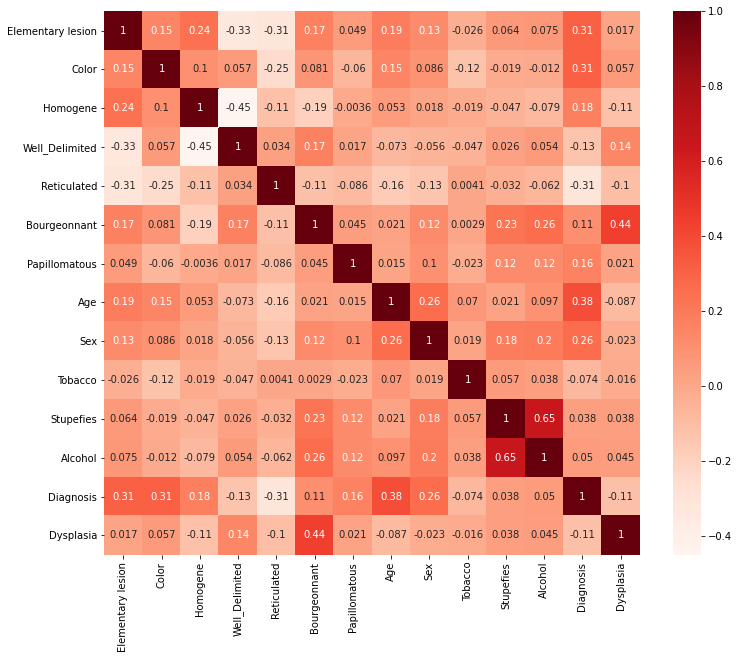

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#del df2['Well_Delimited']
#Correlation with output variable
cor_target = abs(cor["Diagnosis"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print (relevant_features)

Elementary lesion    0.310201
Color                0.311311
Homogene             0.180843
Well_Delimited       0.129456
Reticulated          0.311836
Bourgeonnant         0.105469
Papillomatous        0.163377
Age                  0.383420
Sex                  0.261788
Diagnosis            1.000000
Dysplasia            0.106812
Name: Diagnosis, dtype: float64


In [ ]:
X=df2[df2.columns[0:-2]] 
Y1=df2[df2.columns[-2]] 
Y2=df2[df2.columns[-1]] 

In [ ]:
X.columns

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex', 'Tobacco',
       'Stupefies', 'Alcohol'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.OLS(Y1,X_1).fit()
print(model.pvalues)
zip_OLS = zip(X.columns, model.pvalues.values[1:])
dict_OLS = dict(zip_OLS)
print(dict_OLS)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const                1.379119e-01
Elementary lesion    2.386772e-09
Color                6.809759e-27
Homogene             5.452954e-06
Well_Delimited       3.031511e-02
Reticulated          1.542303e-13
Bourgeonnant         1.001630e-03
Papillomatous        2.342908e-16
Age                  9.629388e-50
Sex                  1.452912e-11
Tobacco              2.281122e-04
Stupefies            8.115612e-01
Alcohol              7.033420e-02
dtype: float64
{'Elementary lesion': 2.3867724761157823e-09, 'Color': 6.809758754802385e-27, 'Homogene': 5.45295351583185e-06, 'Well_Delimited': 0.030315109871037308, 'Reticulated': 1.542302552786991e-13, 'Bourgeonnant': 0.001001629770657357, 'Papillomatous': 2.3429081389528654e-16, 'Age': 9.62938808474355e-50, 'Sex': 1.4529121773608341e-11, 'Tobacco': 0.00022811224269083261, 'Stupefies': 0.8115612089584826, 'Alcohol': 0.07033419650158734}


In [ ]:
weak_correlation = dict()
p_max=0.05
for (key, value) in dict_OLS.items(): 
    if value > p_max:
        weak_correlation[key] = value
print(weak_correlation)

{'Stupefies': 0.8115612089584826, 'Alcohol': 0.07033419650158734}


In [ ]:
for (key, value) in weak_correlation.items():
    del X[key]
print(X.columns)

Index(['Elementary lesion', 'Color', 'Homogene', 'Well_Delimited',
       'Reticulated', 'Bourgeonnant', 'Papillomatous', 'Age', 'Sex',
       'Tobacco'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

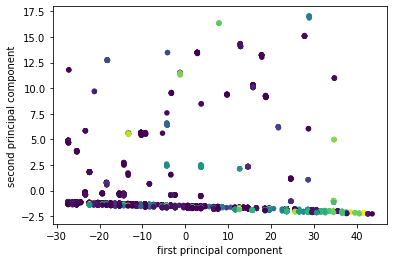

In [ ]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y1, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Y1 as a target
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y1,
                                                    test_size=0.25,
                                                    random_state=1234)
knn.fit(X_train, y_train);

In [ ]:
knn.score(X_test, y_test)

0.8781725888324873

In [ ]:
# Y2 as a target
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y2,
                                                    test_size=0.25,
                                                    random_state=1234)

knn.fit(X_train, y_train);

In [ ]:
knn.score(X_test, y_test)

0.988155668358714